Программа 1

In [16]:
# Импорт всех библиотек
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy import stats
import seaborn as sns
import matplotlib

In [2]:
def read(x): # Функция импорта исходных данных и их обработка
    return pd.read_csv(x, names=["Date", "Time", "Open", "High", "Low", "Close",
                                           "Volume"], skiprows=1, parse_dates=True, delimiter=",")

In [5]:
# Исходные данные, создание столбца
rosn = ["ROSN_Hour.csv", "ROSN_Day.csv", "ROSN_Week.csv", "ROSN_Month.csv"]
sibn = ["SIBN_Hour.csv", "SIBN_Day.csv", "SIBN_Week.csv", "SIBN_Month.csv"]
for i in range(len(rosn)): # Обработка и создание колонки с лог. доходностями
    rosn[i] = read(rosn[i])
    sibn[i] = read(sibn[i])
    rosn[i]["Date"] = pd.to_datetime(rosn[i]["Date"], format='%Y%m%d', errors='ignore')
    sibn[i]["Date"] = pd.to_datetime(sibn[i]["Date"], format='%Y%m%d', errors='ignore')
    rosn[i]["LogProfit"] = (np.log(rosn[i]["Close"]) - np.log(rosn[i]["Open"]))
    sibn[i]["LogProfit"] = (np.log(sibn[i]["Close"]) - np.log(sibn[i]["Open"]))

In [30]:
# Создание массива с лог доходностями за кварталы Роснефть
CloseRosn = list(rosn[3]["Close"])
OpenRosn = list(rosn[3]["Open"])
rosnQuarter = list()
for i in range(0, len(CloseRosn[:9]), 3):
    rosnQuarter.append(np.log(CloseRosn[i + 2] / OpenRosn[i]))
rosnQuarter.append(np.log(CloseRosn[-1] / OpenRosn[-1]))

# Создание массива с лог доходностями за кварталы Газпром Нефть
CloseSibn = list(sibn[3]["Close"])
OpenSibn = list(sibn[3]["Open"])
sibnQuarter = list()
for i in range(0, len(CloseSibn[:9]), 3):
    sibnQuarter.append(np.log(CloseSibn[i + 2] / OpenSibn[i]))
sibnQuarter.append(np.log(CloseSibn[-1] / OpenSibn[-1]))

In [13]:
# Функции для рассчетов по формулам главы 3 КР
def datas(List):
    m = int(1 + 3.322*np.log(len(List))) # Вычисляем M интервалов
    step = ((max(List)) - (min(List))) / (m - 1) # Вычисляем шаг (дельта r)
    ranges = [] # Массив интервалов
    for i in range(m):
        ranges.append(min(List) + i * step)
    data = []
    for j, r in enumerate(ranges[:-1]):
        count = 0
        for i in List:
            if i >= r and i < ranges[j + 1]:
                count += 1
        data.append(count) # Массив с количеством значений в каждом из интервалов
    return step, m, data, ranges

def plot(List, ListOfLogFor): # Вычисления по формулам функции плотности вероятностей
    x = [List[3][i] + List[0] / 2 for i in range(len(List[2]))]
    y = [1 / List[0] * (List[2][i] / len(ListOfLogFor)) for i in range(len(List[2]))]
    return x,y

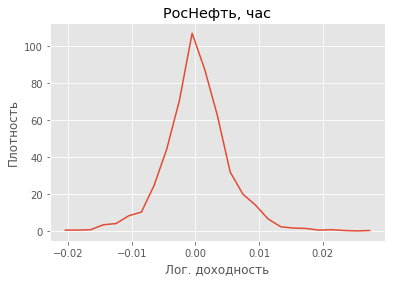

In [72]:
# Построение графика функции плотности распределения вероятностей лог доходностей РосНефти (период = час)
coor = plot(datas(rosn[0]["LogProfit"]), rosn[0]["LogProfit"])
matplotlib.style.use('ggplot')
fig, ax = plt.subplots()
ax.set_xlabel("Лог. доходность")
ax.set_ylabel("Плотность")
ax.set_title("РосНефть, час")
ax.plot(coor[0], coor[1])

C:\Python\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


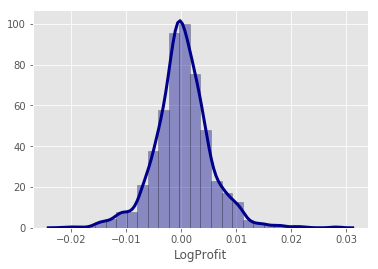

In [32]:
# Построение графика и гистограммы с помощью Seaborn
m = int(1 + 3.322*np.log(len(rosn[0])))

chart = sns.distplot(rosn[0]["LogProfit"], hist=True, kde=True, bins = m,  color = "darkblue", hist_kws = {"edgecolor": "black"}, kde_kws={"linewidth": 3})

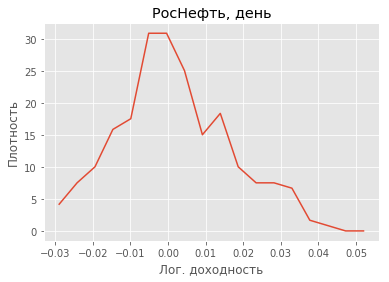

In [73]:
# Построение графика функции плотности распределения вероятностей лог доходностей РосНефти (период = день)
coor = plot(datas(rosn[1]["LogProfit"]), rosn[1]["LogProfit"])
matplotlib.style.use('ggplot')
fig, ax = plt.subplots()
ax.set_xlabel("Лог. доходность")
ax.set_ylabel("Плотность")
ax.set_title("РосНефть, день")
ax.plot(coor[0], coor[1])

C:\Python\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


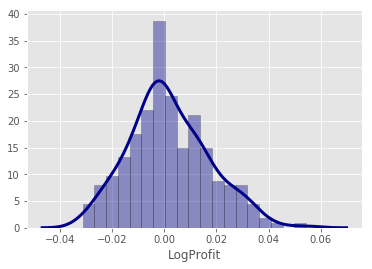

In [33]:
# Построение графика и гистограммы с помощью Seaborn
m = int(1 + 3.322*np.log(len(rosn[1])))

chart = sns.distplot(rosn[1]["LogProfit"], hist=True, kde=True, bins = m,  color = "darkblue", hist_kws = {"edgecolor": "black"}, kde_kws={"linewidth": 3})

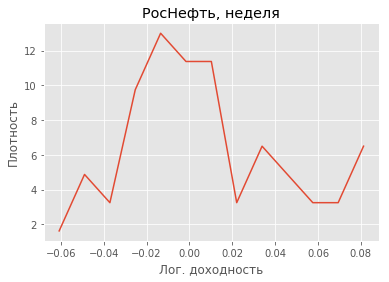

In [81]:
# Построение графика функции плотности распределения вероятностей лог доходностей РосНефти (период = неделя)
coor = plot(datas(rosn[2]["LogProfit"]), rosn[2]["LogProfit"])
matplotlib.style.use('ggplot')
fig, ax = plt.subplots()
ax.set_xlabel("Лог. доходность")
ax.set_ylabel("Плотность")
ax.set_title("РосНефть, неделя")
ax.plot(coor[0], coor[1])

C:\Python\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


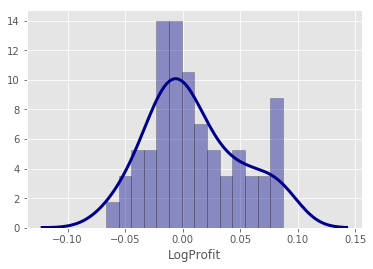

In [34]:
# Построение графика и гистограммы с помощью Seaborn
m = int(1 + 3.322*np.log(len(rosn[2])))

chart = sns.distplot(rosn[2]["LogProfit"], hist=True, kde=True, bins = m,  color = "darkblue", hist_kws = {"edgecolor": "black"}, kde_kws={"linewidth": 3})

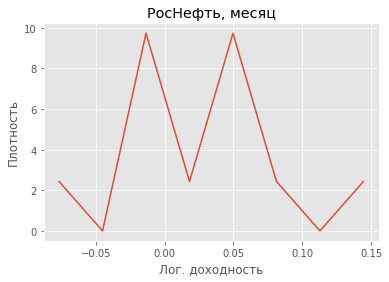

In [74]:
# Построение графика функции плотности распределения вероятностей лог доходностей РосНефти (период = месяц)
coor = plot(datas(rosn[3]["LogProfit"]), rosn[3]["LogProfit"])
matplotlib.style.use('ggplot')
fig, ax = plt.subplots()
ax.set_xlabel("Лог. доходность")
ax.set_ylabel("Плотность")
ax.set_title("РосНефть, месяц")
ax.plot(coor[0], coor[1])

C:\Python\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


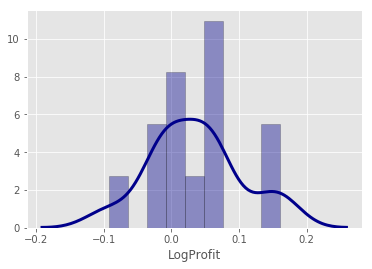

In [35]:
# Построение графика и гистограммы с помощью Seaborn
m = int(1 + 3.322*np.log(len(rosn[3])))

chart = sns.distplot(rosn[3]["LogProfit"], hist=True, kde=True, bins = m,  color = "darkblue", hist_kws = {"edgecolor": "black"}, kde_kws={"linewidth": 3})

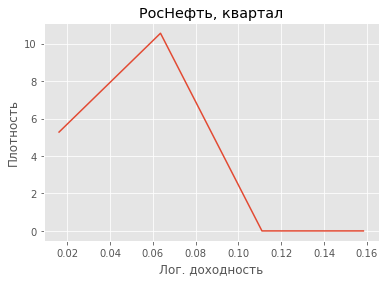

In [75]:
# Построение графика функции плотности распределения вероятностей лог доходностей РосНефти (период = квартал)
coor = plot(datas(rosnQuarter), rosnQuarter)
matplotlib.style.use('ggplot')
fig, ax = plt.subplots()
ax.set_xlabel("Лог. доходность")
ax.set_ylabel("Плотность")
ax.set_title("РосНефть, квартал")
ax.plot(coor[0], coor[1])

C:\Python\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


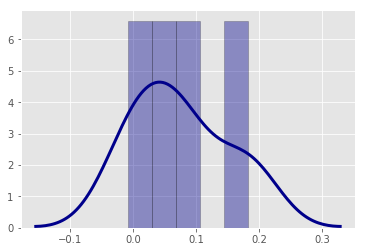

In [82]:
# Построение графика и гистограммы с помощью Seaborn
m = int(1 + 3.322*np.log(len(rosnQuarter)))

chart = sns.distplot(rosnQuarter, hist=True, kde=True, bins = m,  color = "darkblue", hist_kws = {"edgecolor": "black"}, kde_kws={"linewidth": 3})

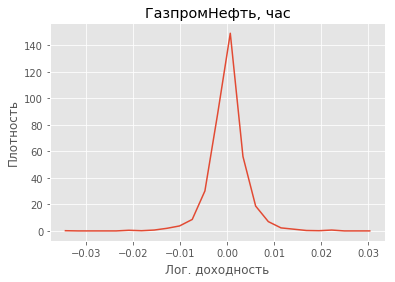

In [76]:
# Построение графика функции плотности распределения вероятностей лог доходностей ГазпромНефти (период = час)
coor = plot(datas(sibn[0]["LogProfit"]), sibn[0]["LogProfit"])
matplotlib.style.use('ggplot')
fig, ax = plt.subplots()
ax.set_xlabel("Лог. доходность")
ax.set_ylabel("Плотность")
ax.set_title("ГазпромНефть, час")
ax.plot(coor[0], coor[1])

C:\Python\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


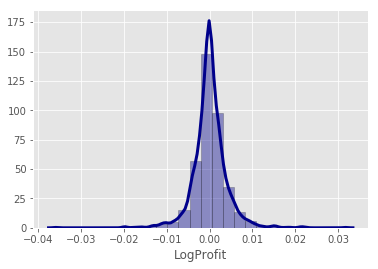

In [42]:
# Построение графика и гистограммы с помощью Seaborn
m = int(1 + 3.322*np.log(len(sibn[0])))

chart = sns.distplot(sibn[0]["LogProfit"], hist=True, kde=True, bins = m,  color = "darkblue", hist_kws = {"edgecolor": "black"}, kde_kws={"linewidth": 3})

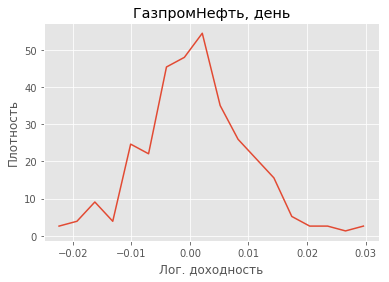

In [77]:
# Построение графика функции плотности распределения вероятностей лог доходностей ГазпромНефти (период = день)
coor = plot(datas(sibn[1]["LogProfit"]), sibn[1]["LogProfit"])
matplotlib.style.use('ggplot')
fig, ax = plt.subplots()
ax.set_xlabel("Лог. доходность")
ax.set_ylabel("Плотность")
ax.set_title("ГазпромНефть, день")
ax.plot(coor[0], coor[1])

C:\Python\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


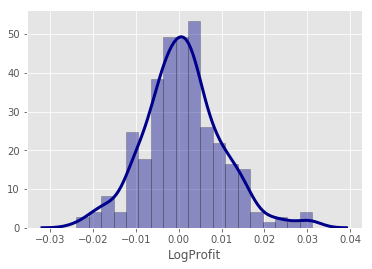

In [43]:
# Построение графика и гистограммы с помощью Seaborn
m = int(1 + 3.322*np.log(len(sibn[1])))

chart = sns.distplot(sibn[1]["LogProfit"], hist=True, kde=True, bins = m,  color = "darkblue", hist_kws = {"edgecolor": "black"}, kde_kws={"linewidth": 3})

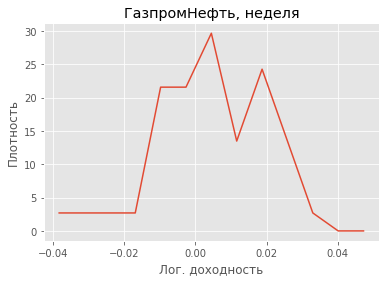

In [78]:
# Построение графика функции плотности распределения вероятностей лог доходностей ГазпромНефти (период = неделя)
coor = plot(datas(sibn[2]["LogProfit"]), sibn[2]["LogProfit"])
matplotlib.style.use('ggplot')
fig, ax = plt.subplots()
ax.set_xlabel("Лог. доходность")
ax.set_ylabel("Плотность")
ax.set_title("ГазпромНефть, неделя")
ax.plot(coor[0], coor[1])

C:\Python\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


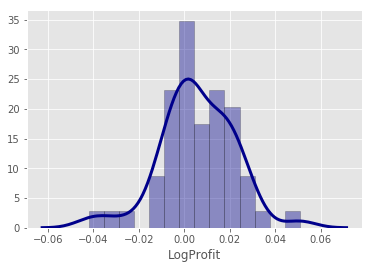

In [44]:
# Построение графика и гистограммы с помощью Seaborn
m = int(1 + 3.322*np.log(len(sibn[2])))

chart = sns.distplot(sibn[2]["LogProfit"], hist=True, kde=True, bins = m,  color = "darkblue", hist_kws = {"edgecolor": "black"}, kde_kws={"linewidth": 3})

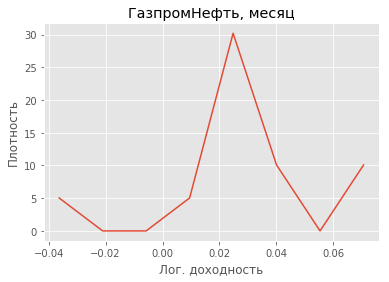

In [79]:
# Построение графика функции плотности распределения вероятностей лог доходностей ГазпромНефти (период = месяц)
coor = plot(datas(sibn[3]["LogProfit"]), sibn[3]["LogProfit"])
matplotlib.style.use('ggplot')
fig, ax = plt.subplots()
ax.set_xlabel("Лог. доходность")
ax.set_ylabel("Плотность")
ax.set_title("ГазпромНефть, месяц")
ax.plot(coor[0], coor[1])

C:\Python\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


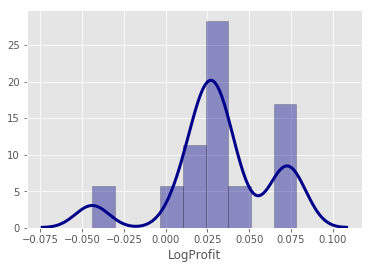

In [45]:
# Построение графика и гистограммы с помощью Seaborn
m = int(1 + 3.322*np.log(len(sibn[3])))

chart = sns.distplot(sibn[3]["LogProfit"], hist=True, kde=True, bins = m,  color = "darkblue", hist_kws = {"edgecolor": "black"}, kde_kws={"linewidth": 3})

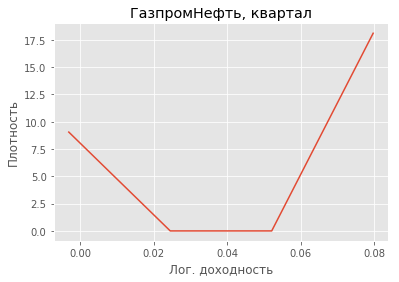

In [80]:
# Построение графика функции плотности распределения вероятностей лог доходностей ГазпромНефти (период = квартал)
coor = plot(datas(sibnQuarter), sibnQuarter)
matplotlib.style.use('ggplot')
fig, ax = plt.subplots()
ax.set_xlabel("Лог. доходность")
ax.set_ylabel("Плотность")
ax.set_title("ГазпромНефть, квартал")
ax.plot(coor[0], coor[1])

C:\Python\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


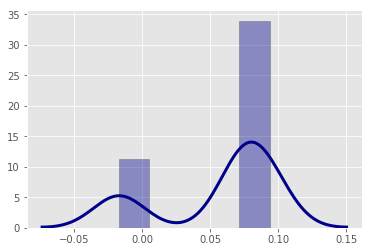

In [46]:
# Построение графика и гистограммы с помощью Seaborn
m = int(1 + 3.322*np.log(len(sibnQuarter)))

chart = sns.distplot(sibnQuarter, hist=True, kde=True, bins = m,  color = "darkblue", hist_kws = {"edgecolor": "black"}, kde_kws={"linewidth": 3})

In [83]:
# Построение матрицы коэффициентов корреляцции РосНефть
rosnQuarter = pd.Series(rosnQuarter)
corrRosn = pd.DataFrame(data = {"hour": rosn[0]["LogProfit"],
                           "day": rosn[1]["LogProfit"], 
                           "week": rosn[2]["LogProfit"],
                           "month": rosn[3]["LogProfit"],
                           "quarter": rosnQuarter})
corrRosn = corrRosn.corr()
print("Матрица коэффициентов корреляции по различным базовым периодам. РосНефть")
corrRosn

Матрица коэффициентов корреляции по различным базовым периодам. РосНефть


,hour,day,week,month,quarter
hour,1.000000,-0.090273,-0.032202,0.327230,-0.635061
day,-0.090273,1.000000,-0.174857,-0.225449,0.035265
week,-0.032202,-0.174857,1.000000,-0.086116,-0.666238
month,0.327230,-0.225449,-0.086116,1.000000,-0.616397
quarter,-0.635061,0.035265,-0.666238,-0.616397,1.000000


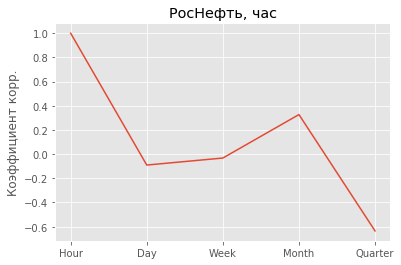

In [84]:
# График, строка 1 (час)
y = list(corrRosn["hour"])
x = range(5)
labels = ["Hour", "Day", "Week", "Month", "Quarter"]
matplotlib.style.use('ggplot')
fig, ax = plt.subplots()
ax.set_xticklabels(labels)
ax.set_xticks(x)
ax.set_ylabel("Коэффициент корр.")
ax.set_title("РосНефть, час")
ax.plot(x,y)

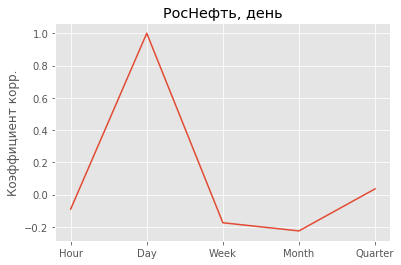

In [85]:
# График, строка 2 (день)
y = list(corrRosn["day"])
x = range(5)
labels = ["Hour", "Day", "Week", "Month", "Quarter"]
matplotlib.style.use('ggplot')
fig, ax = plt.subplots()
ax.set_xticklabels(labels)
ax.set_xticks(x)
ax.set_ylabel("Коэффициент корр.")
ax.set_title("РосНефть, день")
ax.plot(x,y)

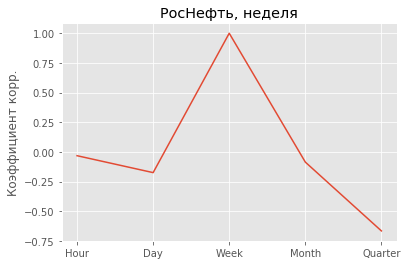

In [86]:
# График, строка 3 (неделя)
y = list(corrRosn["week"])
x = range(5)
labels = ["Hour", "Day", "Week", "Month", "Quarter"]
matplotlib.style.use('ggplot')
fig, ax = plt.subplots()
ax.set_xticklabels(labels)
ax.set_xticks(x)
ax.set_ylabel("Коэффициент корр.")
ax.set_title("РосНефть, неделя")
ax.plot(x,y)

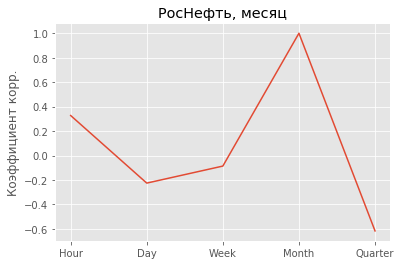

In [87]:
# График, строка 4 (месяц)
y = list(corrRosn["month"])
x = range(5)
labels = ["Hour", "Day", "Week", "Month", "Quarter"]
matplotlib.style.use('ggplot')
fig, ax = plt.subplots()
ax.set_xticklabels(labels)
ax.set_xticks(x)
ax.set_ylabel("Коэффициент корр.")
ax.set_title("РосНефть, месяц")
ax.plot(x,y)

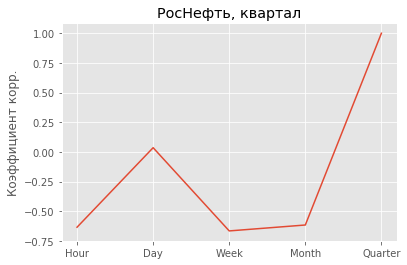

In [88]:
# График, строка 5 (квартал)
y = list(corrRosn["quarter"])
x = range(5)
labels = ["Hour", "Day", "Week", "Month", "Quarter"]
matplotlib.style.use('ggplot')
fig, ax = plt.subplots()
ax.set_xticklabels(labels)
ax.set_xticks(x)
ax.set_ylabel("Коэффициент корр.")
ax.set_title("РосНефть, квартал")
ax.plot(x,y)

In [64]:
# Построение матрицы коэффициентов корреляцции ГазпромНефть
sibnQuarter = pd.Series(sibnQuarter)
corrSibn = pd.DataFrame(data = {"hour": sibn[0]["LogProfit"],
                           "day": sibn[1]["LogProfit"], 
                           "week": sibn[2]["LogProfit"],
                           "month": sibn[3]["LogProfit"],
                           "quarter": sibnQuarter})
corrSibn = corrSibn.corr()
corrSibn

,hour,day,week,month,quarter
hour,1.000000,-0.002195,-0.246653,0.007286,0.059566
day,-0.002195,1.000000,-0.103822,-0.217214,0.287790
week,-0.246653,-0.103822,1.000000,-0.011257,-0.505238
month,0.007286,-0.217214,-0.011257,1.000000,0.936797
quarter,0.059566,0.287790,-0.505238,0.936797,1.000000


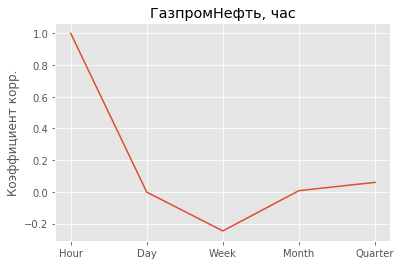

In [89]:
# График, строка 1 (час)
y = list(corrSibn["hour"])
x = range(5)
labels = ["Hour", "Day", "Week", "Month", "Quarter"]
matplotlib.style.use('ggplot')
fig, ax = plt.subplots()
ax.set_xticklabels(labels)
ax.set_xticks(x)
ax.set_ylabel("Коэффициент корр.")
ax.set_title("ГазпромНефть, час")
ax.plot(x,y)

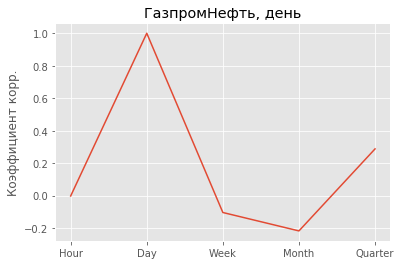

In [90]:
# График, строка 2 (день)
y = list(corrSibn["day"])
x = range(5)
labels = ["Hour", "Day", "Week", "Month", "Quarter"]
matplotlib.style.use('ggplot')
fig, ax = plt.subplots()
ax.set_xticklabels(labels)
ax.set_xticks(x)
ax.set_ylabel("Коэффициент корр.")
ax.set_title("ГазпромНефть, день")
ax.plot(x,y)

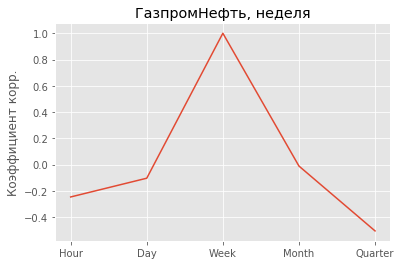

In [91]:
# График, строка 3 (неделя)
y = list(corrSibn["week"])
x = range(5)
labels = ["Hour", "Day", "Week", "Month", "Quarter"]
matplotlib.style.use('ggplot')
fig, ax = plt.subplots()
ax.set_xticklabels(labels)
ax.set_xticks(x)
ax.set_ylabel("Коэффициент корр.")
ax.set_title("ГазпромНефть, неделя")
ax.plot(x,y)

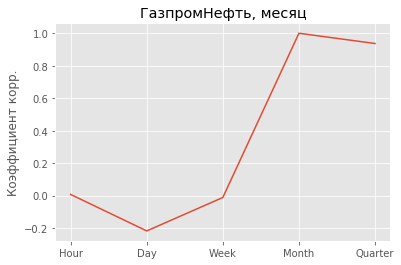

In [92]:
# График, строка 4 (месяц)
y = list(corrSibn["month"])
x = range(5)
labels = ["Hour", "Day", "Week", "Month", "Quarter"]
matplotlib.style.use('ggplot')
fig, ax = plt.subplots()
ax.set_xticklabels(labels)
ax.set_xticks(x)
ax.set_ylabel("Коэффициент корр.")
ax.set_title("ГазпромНефть, месяц")
ax.plot(x,y)

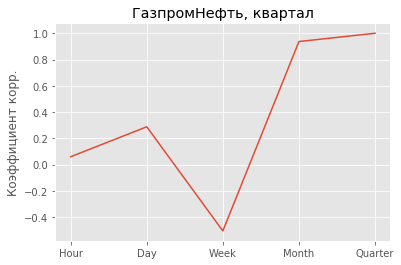

In [93]:
# График, строка 5 (квартал)
y = list(corrSibn["quarter"])
x = range(5)
labels = ["Hour", "Day", "Week", "Month", "Quarter"]
matplotlib.style.use('ggplot')
fig, ax = plt.subplots()
ax.set_xticklabels(labels)
ax.set_xticks(x)
ax.set_ylabel("Коэффициент корр.")
ax.set_title("ГазпромНефть, квартал")
ax.plot(x,y)